Notebook em **Python** que mostra procedimentos para a obtenção de um **Gráfico de Linha** e de um **Gráfico de Barras** a partir de um exemplo do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)**

<!-- TEASER_END -->

# Exemplos do livro Six Sigma: A Complete Step-by-Step Guide

![Six Sigma: A Complete Step-by-Step Guide](https://raw.githubusercontent.com/vstram/SixSigmaInR/master/book_cover-small.jpg)

## Conteúdo:
* [Exercício](#Exercício)
* [Procedimento](#Procedimento)
* [Solução Alternativa](#Solução-Alternativa)
* [Referências](#Referências)

## Exercício

O exercício (pág 201) pede para calcular a taxa de retornos a cada 100 vendas ao longo de 12 meses. A tabela com o número de retornos e o número de vendas para esse período é fornecida.

## Procedimento

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Carregar os dados a partir do arquivo CSV

In [47]:
filename = "ch13p201.txt"
df = pd.read_csv(filename)
df

,Month,NumberOfReturns,NumberOfSales
0,January,105,3500
1,Febrary,95,2200
2,March,125,2500
3,April,140,2800
4,May,215,3000
5,June,200,2900
6,Jule,190,2700
7,August,245,3300
8,September,225,3100
9,October,270,3700


### 2. Calcular a taxa de retornos

A taxa de retorno é definida como $ReturnsRate = \frac{NumberOfReturns}{NumberOfSales} \times 100$

In [48]:
df["ReturnsRate"] = df["NumberOfReturns"] / df["NumberOfSales"] * 100
df

,Month,NumberOfReturns,NumberOfSales,ReturnsRate
0,January,105,3500,3.000000
1,Febrary,95,2200,4.318182
2,March,125,2500,5.000000
3,April,140,2800,5.000000
4,May,215,3000,7.166667
5,June,200,2900,6.896552
6,Jule,190,2700,7.037037
7,August,245,3300,7.424242
8,September,225,3100,7.258065
9,October,270,3700,7.297297


### 3. Plotar o gráfico

A biblioteca `seaborn` possui um arsenal de possibilidades de configuração do gráfico bastante grande e poderoso. Pode-se usar este poderio para 'passar a mensagem' em seus gráficos.

In [49]:
# Calcula a mediana dos dados de ReturnsRate
med = df["ReturnsRate"].median()
med

6.9667943805874835

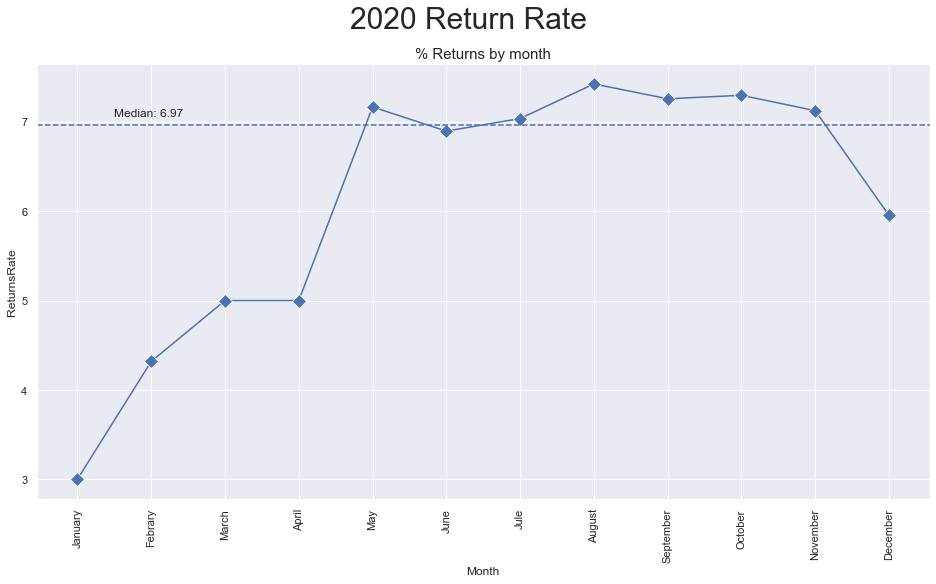

In [50]:
# Configura o tamanho do grafico
plt.figure(figsize=(16,8))

# Cria e configura o gráfico de linhas
ax = sns.lineplot(
    x="Month", # título eixo x
    y="ReturnsRate", # título eixo y
    sort=False, # não ordena os dados
    marker="D", # define símbolo 'diamante'
    markersize=10, # define o tamanho do símbolo
    data=df, 
)

# Desenha uma linha horizontal, junto com uma anotação
ax.axhline(med, ls='--')
ax.text(0.5,med + 0.1, f"Median: {med:.2f}")

# Configura os títulos
plt.suptitle("2020 Return Rate", fontsize=30) # define e ajusta o tamanho da fonte do título
plt.title("% Returns by month", fontsize=15) # define e ajusta o tamanho da fonte do subtítulo

# Ajusta a inclinação dos labels do eixo x
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

## Solução Alternativa

Embora o exemplo solicitasse um gráfico de linha, às vezes para passar a mensagem deve-se pensar em outro tipo de gráfico. Pessoalmente, gosto do gráfico de barras. No exemplo abaixo, o gráfico foi configurado para colorir apenas as barras que ultrapassaram a mediana. Esse mesmo método pode ser usado para destacar barras através de um critério mais complexo, caso seja necessário.

In [51]:
# Define critério usado para destacar as barras
df["AboveMedian"] = df["ReturnsRate"] > med
df

,Month,NumberOfReturns,NumberOfSales,ReturnsRate,AboveMedian
0,January,105,3500,3.000000,False
1,Febrary,95,2200,4.318182,False
2,March,125,2500,5.000000,False
3,April,140,2800,5.000000,False
4,May,215,3000,7.166667,True
5,June,200,2900,6.896552,False
6,Jule,190,2700,7.037037,True
7,August,245,3300,7.424242,True
8,September,225,3100,7.258065,True
9,October,270,3700,7.297297,True


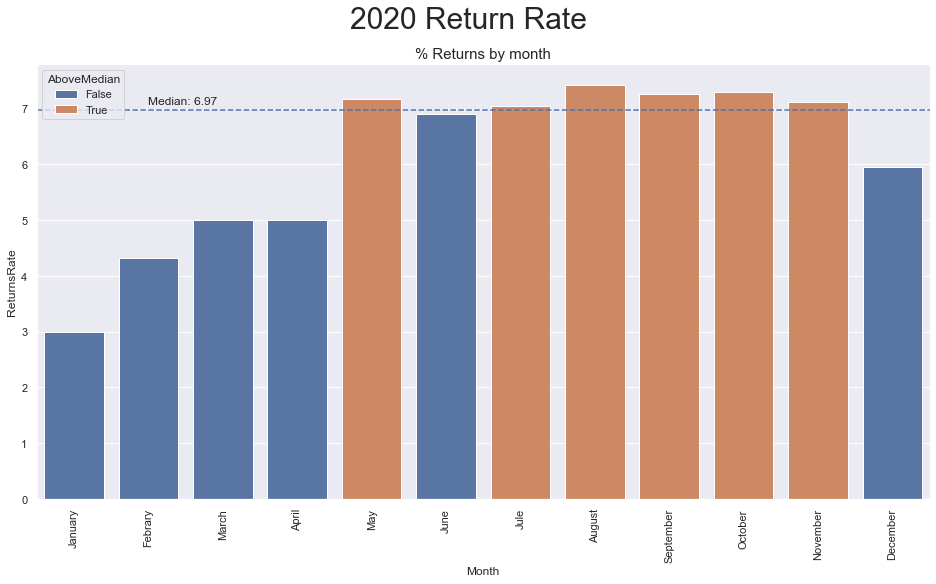

In [62]:
# Configura o tamanho do gráfico
plt.figure(figsize=(16,8))

# Cria e configura o gráfico de linhas
ax = sns.barplot(
    x="Month", # título eixo x
    y="ReturnsRate", # título eixo y
    data=df, 
    hue="AboveMedian", # agrupa as barras segundo o critério, colorindo True e 
    dodge=False # importante para manter as barras alinhadas uniformemente
)

# Desenha uma linha horizontal, junto com uma anotação
ax.axhline(med, ls='--')
ax.text(1,med + 0.1, f"Median: {med:.2f}")

# Configura os títulos
plt.suptitle("2020 Return Rate", fontsize=30) # define e ajusta o tamanho da fonte do título
plt.title("% Returns by month", fontsize=15) # define e ajusta o tamanho da fonte do subtítulo

# Ajusta a inclinação dos labels do eixo x
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

## Referências

Este notebook contém exemplos do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)** disponibilizado pelo [The Council for Six Sigma Certification](https://www.sixsigmacouncil.org/six-sigma-training-material/)

Consulte:
* [Seaborn](https://seaborn.pydata.org/index.html)